In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd
import random

## Simulate from Class

In [2]:
x = np.genfromtxt('data/input.csv', delimiter=',')
x.shape

(20000, 9)

In [3]:
simulation = np.genfromtxt('data/output.csv', delimiter=',')
simulation.shape

(20000,)

In [4]:
y = simulation

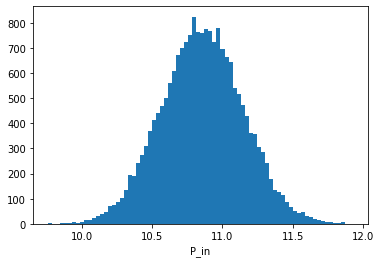

In [5]:
# Plot historgram
plt.hist(simulation, bins = 'auto')
plt.xlabel('P_in')
plt.show()

In [ ]:
# Tolerances of electronic components
# Used to initialize the class
from PSU_class import PSU

Vout = np.array([3.2, 3.3, 3.4])
LS_Ron = np.array([6.3, 8.3, 11])*1e-3
Iout = np.array([2.64, 3.03, 3.45])
Vin = np.array([13.3, 13.35, 13.37])
Fsw = np.array([430, 455, 489])*1e3
Vbody_diode = np.array([0.65, 0.8, 1.2])
L = np.array([5.4, 4.5, 3.6])*1e-6
DCR = np.array([12.61, 19, 27.23])*1e-3
P_IC = np.array([83.93, 88.81, 93.69])*1e-3

model = PSU(Vout, LS_Ron, Iout, Vin, Fsw, Vbody_diode, L, DCR, P_IC)

limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2]
limit_nom = model.P_in()[1]

## Model Selection Methods

### Chi-Square

In [6]:
from helper_functions import compute_chi_square

results = compute_chi_square(simulation)

Distribution: weibull_min || Parameters: (4.209823302146594, 9.752128013554469, 1.2126126763129437)
Distribution: norm || Parameters: (10.855754143885084, 0.289212270506663)
Distribution: weibull_max || Parameters: (4.165789169745157, 11.944527058417233, 1.197107615621026)
Distribution: beta || Parameters: (1382.2562704618335, 2140.0620851779486, -2.940879469826651, 35.157109414961276)
Distribution: invgauss || Parameters: (0.014824681595628057, 8.417802033380093, 164.2301758633106)
Distribution: uniform || Parameters: (9.763923621594225, 2.1602092690086625)
Distribution: gamma || Parameters: (18158.834821631688, -28.11696932776931, 0.002146212788737483)
Distribution: expon || Parameters: (9.763923621594225, 1.0918305222908593)
Distribution: lognorm || Parameters: (0.012696297372284948, -11.91493143058753, 22.768545993004153)
Distribution: pearson3 || Parameters: (0.8092113114970197, 10.898386520782875, 0.4594465725723764)
Distribution: triang || Parameters: (0.508571469294267, 9.76375

In [7]:
results

,Distribution,Log_likelihood,Chi_square,Parameters
1,norm,-3566.883455,0.0,"(10.855754143885084, 0.289212270506663)"
3,beta,-3566.513365,1.0,"(1382.2562704618335, 2140.0620851779486, -2.94..."
6,gamma,-3566.515747,1.0,"(18158.834821631688, -28.11696932776931, 0.002..."
8,lognorm,-3567.430566,2.0,"(0.012696297372284948, -11.91493143058753, 22...."
2,weibull_max,-3648.776199,42.0,"(4.165789169745157, 11.944527058417233, 1.1971..."
0,weibull_min,-3667.089562,61.0,"(4.209823302146594, 9.752128013554469, 1.21261..."
4,invgauss,-3776.837869,159.0,"(0.014824681595628057, 8.417802033380093, 164...."
9,pearson3,-6528.510339,3397.0,"(0.8092113114970197, 10.898386520782875, 0.459..."
10,triang,-6916.007006,4957.0,"(0.508571469294267, 9.76375419579111, 2.160549..."
5,uniform,-15404.102016,18559.0,"(9.763923621594225, 2.1602092690086625)"


In [8]:
results_test = results.drop(results.index[3])
results_test

,Distribution,Log_likelihood,Chi_square,Parameters
1,norm,-3566.883455,0.0,"(10.855754143885084, 0.289212270506663)"
3,beta,-3566.513365,1.0,"(1382.2562704618335, 2140.0620851779486, -2.94..."
6,gamma,-3566.515747,1.0,"(18158.834821631688, -28.11696932776931, 0.002..."
2,weibull_max,-3648.776199,42.0,"(4.165789169745157, 11.944527058417233, 1.1971..."
0,weibull_min,-3667.089562,61.0,"(4.209823302146594, 9.752128013554469, 1.21261..."
4,invgauss,-3776.837869,159.0,"(0.014824681595628057, 8.417802033380093, 164...."
9,pearson3,-6528.510339,3397.0,"(0.8092113114970197, 10.898386520782875, 0.459..."
10,triang,-6916.007006,4957.0,"(0.508571469294267, 9.76375419579111, 2.160549..."
5,uniform,-15404.102016,18559.0,"(9.763923621594225, 2.1602092690086625)"
7,expon,-21757.113318,50125.0,"(9.763923621594225, 1.0918305222908593)"


### Plots

In [9]:
import seaborn as sns
simulation.sort()

In [10]:
params_gamma = results.iloc[2]['Parameters']
params_beta = results.iloc[1]['Parameters']
params_normal = results.iloc[0]['Parameters']
params_uniform = results.iloc[9]['Parameters']
params_lognorm = results.iloc[4]['Parameters']

**Normal plot**

In [11]:
type(params_normal)

tuple

In [12]:
z_alpha_2 = 0.4801

In [13]:
mu_sample = params_normal[0]
variance_sample = params_normal[1]**2 / 20000

In [14]:
interval_L = mu_sample - z_alpha_2 * variance_sample
interval_U = mu_sample + z_alpha_2 * variance_sample
params_normal_1 = (interval_L, params_normal[1])
params_normal_2 = (interval_U, params_normal[1])

In [15]:
params_normal_1

(10.855752136017168, 0.289212270506663)

In [16]:
scipy.stats.norm.ppf([0.000001, 0.5, 0.999999], *params_normal_1)

array([ 9.4810035 , 10.85575214, 12.23050077])

In [17]:
best_dist = getattr(scipy.stats, 'norm')
best_params = params_normal

In [18]:
quantiles = best_dist.ppf([0.000001, 0.5, 0.999999], *best_params)
quantiles_1 = np.zeros(2)
quantiles_1[0] = quantiles[0] - z_alpha_2 * variance_sample
quantiles_1[1] = quantiles[2] + z_alpha_2 * variance_sample
quantiles_1

array([ 9.4810035 , 12.23050479])

In [19]:
quantiles_h = best_dist.ppf([0.00001, 0.5, 0.99999], *best_params)
quantiles_h_1 = np.zeros(2)
quantiles_h_1[0] = quantiles_h[0] - z_alpha_2 * variance_sample
quantiles_h_1[1] = quantiles_h[2] + z_alpha_2 * variance_sample

In [20]:
quantiles_h_1

array([ 9.62229339, 12.0892149 ])

In [21]:
#(1 -(quantiles_h_1[1]-quantiles_h_1[0])/(limit_MAX - limit_min))*100

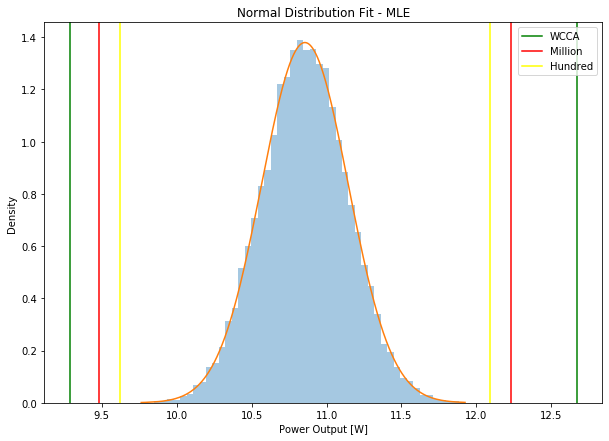

In [25]:
plt.figure(figsize=(10,7))
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
#plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal_1))
#plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal_2))
plt.axvline(x=limit_min, color='green',label="WCCA")
plt.axvline(x=limit_MAX, color='green')
# Million
plt.axvline(x=quantiles_1[0], color='red', label="Million")
plt.axvline(x=quantiles_1[1], color='red')

# Hundred
plt.axvline(x=quantiles_h_1[0], color='yellow', label="Hundred")
plt.axvline(x=quantiles_h_1[1], color='yellow')

plt.legend()

norm_fit.set_title('Normal Distribution Fit - MLE')
norm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/Quantiles_Normal.png')

In [110]:
quantile_plot = np.zeros(2000)

quantile_plot_min = np.zeros(2000)
quantile_plot_min_min = np.zeros(2000)
quantile_plot_min_max = np.zeros(2000)

quantile_plot_max = np.zeros(2000)
quantile_plot_max_min = np.zeros(2000)
quantile_plot_max_max = np.zeros(2000)

std_sample_loop_array = np.zeros(2000)

indices = np.arange(0,len(y))
random.seed(1234)
random.shuffle(indices)

for i in range(2,len(y)):
    test = y[indices[:i]]
    param = scipy.stats.norm.fit(test)

    # Sample Measures
    std_sample_loop = param[1] / math.sqrt(i)
    std_sample_loop_array[i-2] = z_alpha_2 * std_sample_loop
    
    q_min, q_max = scipy.stats.norm.ppf([0.00001, 0.99999], *param)
    
    # q_min
    quantile_plot_min[i-2] = q_min
    #q_max
    quantile_plot_max[i-2] = q_max
    #q_nominal
    quantile_plot[i-2] = param[0]

    if abs((quantile_plot[i-2] - quantile_plot[i-3])) < 1e-4 and std_sample_loop**2 < 1e-3:
        break

end_loop_index = np.where(quantile_plot_mean==0)[0][0]

In [111]:
i

104

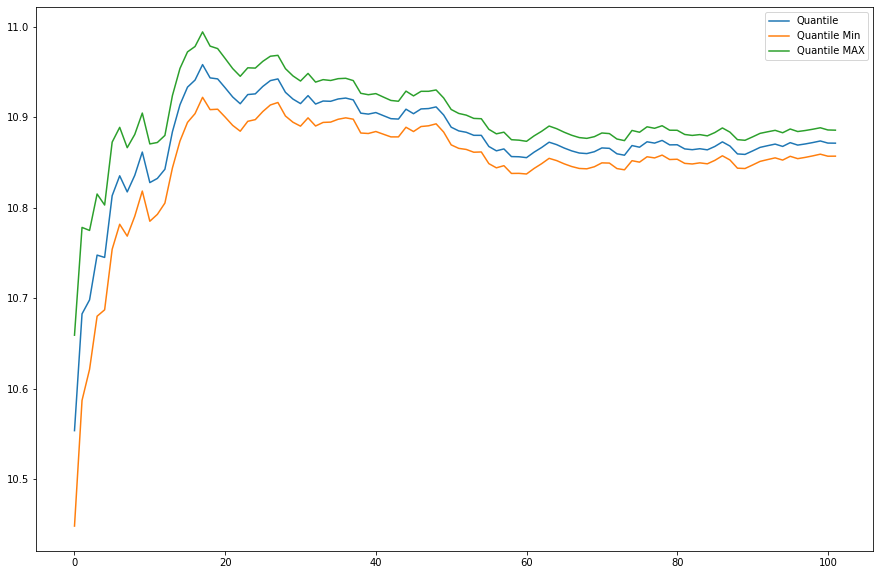

In [109]:
plt.figure(figsize=(15,10))
plt.plot(quantile_plot[1:end_loop_index], label = 'Quantile')
plt.plot(quantile_plot[1:end_loop_index] - std_sample_loop_array[1:end_loop_index] , label = 'Quantile Min')
plt.plot(quantile_plot[1:end_loop_index] + std_sample_loop_array[1:end_loop_index] , label = 'Quantile MAX')
plt.legend()
plt.show()

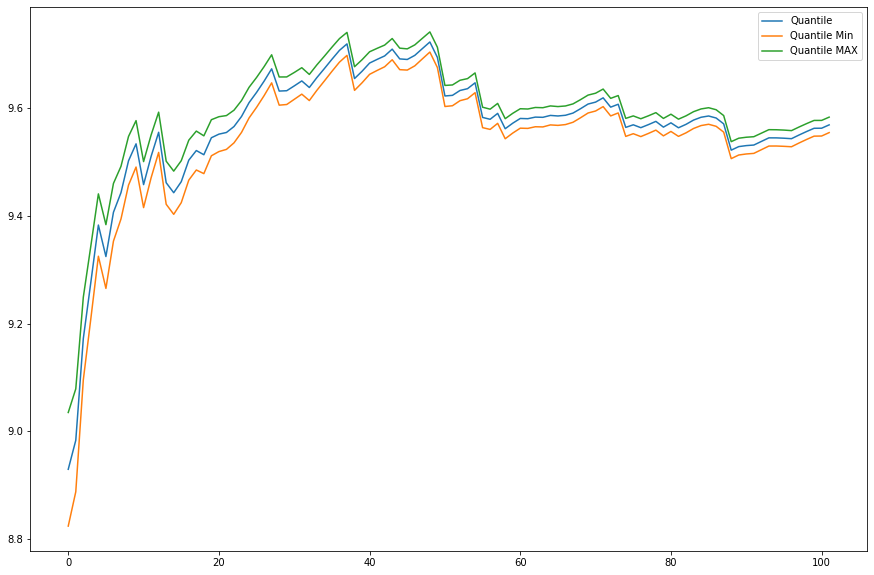

In [107]:
plt.figure(figsize=(15,10))
plt.plot(quantile_plot_min[1:end_loop_index], label = 'Quantile')
plt.plot(quantile_plot_min[1:end_loop_index] - std_sample_loop_array[1:end_loop_index] , label = 'Quantile Min')
plt.plot(quantile_plot_min[1:end_loop_index] + std_sample_loop_array[1:end_loop_index] , label = 'Quantile MAX')
plt.legend()
plt.show()

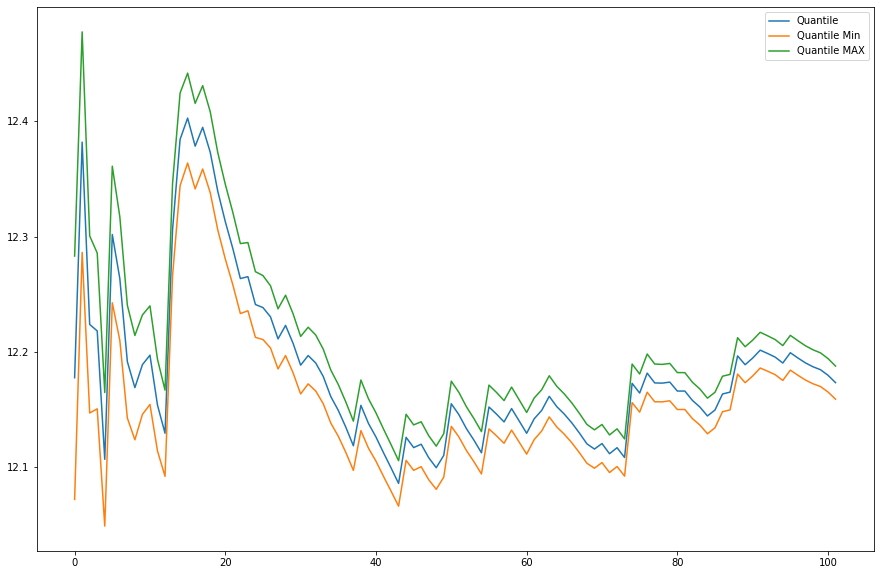

In [108]:
plt.figure(figsize=(15,10))
plt.plot(quantile_plot_max[1:end_loop_index], label = 'Quantile')
plt.plot(quantile_plot_max[1:end_loop_index] - std_sample_loop_array[1:end_loop_index] , label = 'Quantile Min')
plt.plot(quantile_plot_max[1:end_loop_index] + std_sample_loop_array[1:end_loop_index] , label = 'Quantile MAX')
plt.legend()
plt.show()

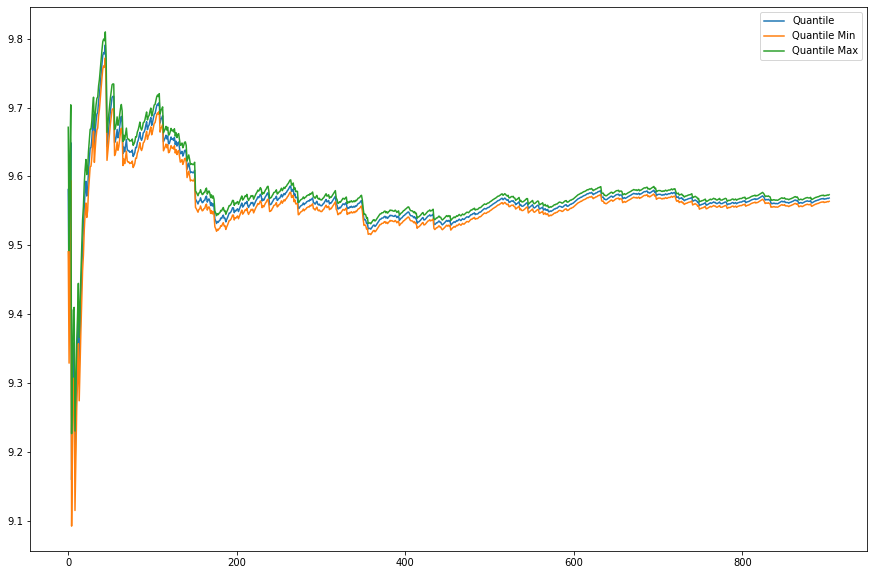

In [59]:
plt.figure(figsize=(15,10))
plt.plot(quantile_plot_min[1:end_loop_index], label = 'Quantile')
plt.plot(quantile_plot_min_min[1:end_loop_index], label = 'Quantile Min')
plt.plot(quantile_plot_min_max[1:end_loop_index], label = 'Quantile Max')
plt.savefig('Data/Plots/Quantile_min.png')
plt.legend()

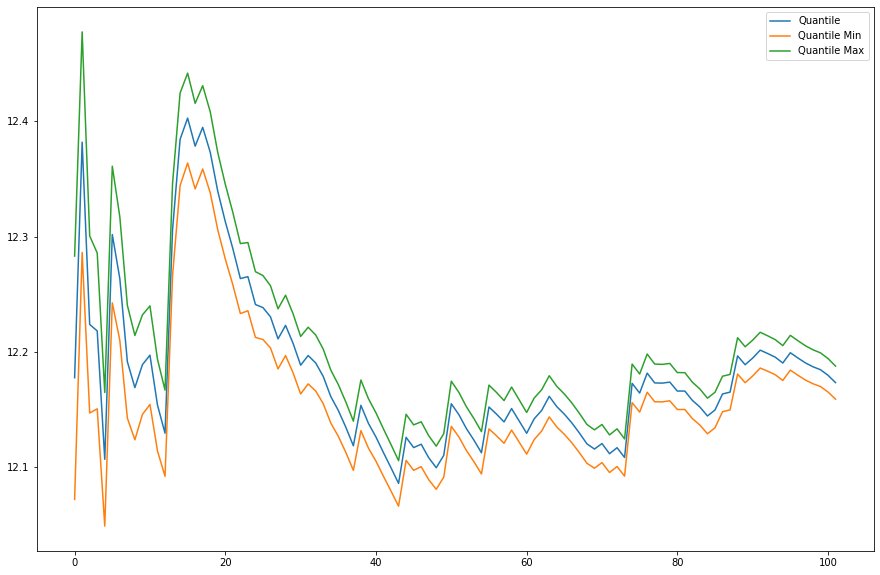

In [97]:
plt.figure(figsize=(15,10))
plt.plot(quantile_plot_max[1:end_loop_index], label = 'Quantile')
plt.plot(quantile_plot_max_min[1:end_loop_index], label = 'Quantile Min')
plt.plot(quantile_plot_max_max[1:end_loop_index], label = 'Quantile Max')
plt.savefig('Data/Plots/Quantile_MAX.png')
plt.legend()

In [ ]:
np.where(quantile_plot_mean==0)

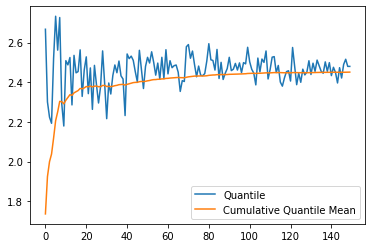

In [126]:
plt.plot(quantile_plot[1:end_loop_index], label = 'Quantile')
plt.plot(quantile_plot_mean[1:end_loop_index], label = 'Cumulative Quantile Mean')
plt.legend()

**Gamma plot**

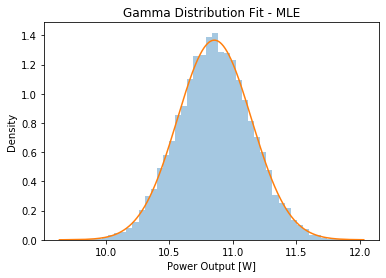

In [11]:
gamma_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.gamma.pdf(simulation, *params_gamma))
gamma_fit.set_title('Gamma Distribution Fit - MLE')
gamma_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Gamma.png')

**Beta plot**

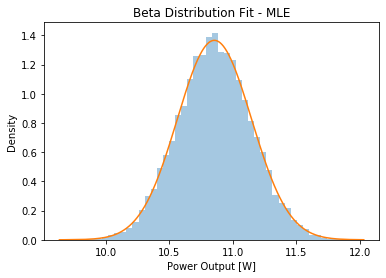

In [12]:
beta_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.beta.pdf(simulation, *params_beta))
beta_fit.set_title('Beta Distribution Fit - MLE')
beta_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Beta.png')

**Uniform plot**

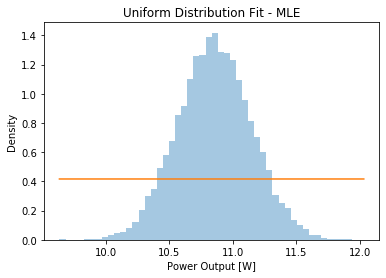

In [13]:
uniform_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.uniform.pdf(simulation, *params_uniform))
uniform_fit.set_title('Uniform Distribution Fit - MLE')
uniform_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Uniform.png')

**Lognormal plot**

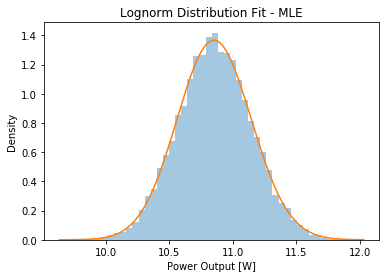

In [14]:
lognorm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
lognorm_fit.set_title('Lognorm Distribution Fit - MLE')
lognorm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Lognorm.png')

**Model A:** Normal Distribution

**Model B:** Beta Distribution

### Non-Nested Likelihood Ratio Test

Compare **Model A** to **Model B** and choose the best fit. 

In [35]:

n_sim = 20000 

In [16]:
#sampling_dist = getattr(scipy.stats, dist_A)
#dataset = sampling_dist.rvs(*param, size = n_sim)
#scipy.stats.lognorm.rvs(*params_lognorm, size = 1000)

In [36]:
from helper_functions import LRT

Q, Q_array, qQi = LRT(results.iloc[:2], 1000, n_simulation)
if Q < qQi: print('Select model A')

Select model A


In [54]:
a = Q_array > Q


print(f"p_value = {p_value}")
print('we fail to reject the null hypothesis')

p_value = 0.647
we fail to reject the null hypothesis


In [56]:
Q, Q_array, qQi = LRT(results.iloc[:2], 100, 10000)

NameError: name 'Q_arrray' is not defined

In [75]:
best_fits = results_test[:4]
best_fits

,Distribution,Log_likelihood,Chi_square,Parameters
1,norm,-3752.198981,1.0,"(10.856260930361984, 0.2919045002438211)"
3,beta,-3751.940079,1.0,"(364.87933577547363, 431.3367243552041, 3.2758..."
6,gamma,-3751.963996,1.0,"(28532.084433159544, -38.45065752075047, 0.001..."
8,lognorm,-3752.687748,2.0,"(0.010872404014110125, -16.003623600716686, 26..."


In [102]:
best_fits.iloc[0]['Distribution']

'norm'

In [103]:
# best fitted distribution information
null = []
alternative = []
p_values = []
for i in range(best_fits.shape[1]):
    for j in range(best_fits.shape[1]):
        if i<j:
            null.append(best_fits.iloc[i]['Distribution'])
            alternative.append(best_fits.iloc[j]['Distribution'])
            p_values.append(LRT(best_fits.iloc[[i, j],:]))

LRT_dataframe = pd.DataFrame()
LRT_dataframe['Null'] = null
LRT_dataframe['Alternative'] = alternative
LRT_dataframe['p_values'] = p_values

TypeError: LRT() missing 2 required positional arguments: 'n_datasets' and 'n_sim'

In [ ]:
"""
def p_value_LRT(dist_A, dist_B, ...):
    pass
    
def given_df_doit_forany_pair(dataframe, ...):
    pass
"""

In [80]:
for dist in best_fits['Distribution']:
    print(dist)

norm
beta
gamma
lognorm


In [73]:
for row in best_fits.itertuples():
    dist = row[1]
    ll = row[2]
    pars = row[4]
    print(dist, ll, pars)

norm -3752.1989807498094 (10.856260930361984, 0.2919045002438211)
beta -3751.9400786272727 (364.87933577547363, 431.3367243552041, 3.2758077228036275, 16.54157441896509)
gamma -3751.963996110023 (28532.084433159544, -38.45065752075047, 0.0017281219025688426)
lognorm -3752.6877477593744 (0.010872404014110125, -16.003623600716686, 26.85801472349138)


In [96]:
test = best_fits.iloc[[0,1],:]


,Distribution,Log_likelihood,Chi_square,Parameters
1,norm,-3752.198981,1.0,"(10.856260930361984, 0.2919045002438211)"
3,beta,-3751.940079,1.0,"(364.87933577547363, 431.3367243552041, 3.2758..."


In [107]:
p1, p2 = LRT(results.iloc[:2], 100, 10000)

In [109]:
p2

0.61

In [110]:
def LRT(best_options, n_datasets, n_sim):
    """
    Docs: 
    - best_options: so far is a dataframe
    - n_datasets: number of datasets S to simulate from the best estimate
    - n_sim: how many observations to simulate for each dataset
    """
    # Null Model
    dist_A = getattr(scipy.stats, best_options.iloc[0]['Distribution'])
    ll_A = best_options.iloc[0]['Log_likelihood']
    param = best_options.iloc[0]['Parameters']
    
    # Alternative Model
    dist_B = getattr(scipy.stats, best_options.iloc[1]['Distribution'])
    ll_B = best_options.iloc[1]['Log_likelihood']
    
    # LRT Statistic
    Q = 2 * (ll_B - ll_A)
    
    #P value counter
    p_value_counter = 0
    
    for i in range(n_datasets):
        # Generate dataset
        dataset = dist_A.rvs(*param, size = n_sim)
        
        # Fit models
        param_A_i = dist_A.fit(dataset)
        ll_A_i = np.sum(np.log(dist_A.pdf(dataset, *param_A_i)))

        param_B_i = dist_B.fit(dataset)
        ll_B_i = np.sum(np.log(dist_B.pdf(dataset, *param_B_i)))
        
        # Compute Qi
        Q_i = 2 * (ll_B_i - ll_A_i)
        #Q_array[i] = Q_i 
        
        if Q_i > Q:
            p_value_counter += 1
    
    #Quantile_Q = np.quantile(Q_array, 0.95)
    #p_value_1 = np.sum(Q_array>Q)/n_datasets
    p_value = p_value_counter / n_datasets

    return p_value

### Q-Q Plot

Compare **Model A** to **Model B** on a quantile-quantile plot. 

In [ ]:
from helper_functions import qqplot

qqplot(simulation, results)

### Chosen Model Description

In [17]:
best_name = results.iloc[0]['Distribution']
best_params = results.iloc[0]['Parameters']

best_dist = getattr(scipy.stats, best_name)

## Plot Choosen Model Againts Data

In [ ]:
import seaborn as sns

**Simulated Data Histogram**

In [ ]:
sns.distplot(a = simulation, kde = False, norm_hist=True)
sns.kdeplot(data = simulation, shade= False)

**Chosen Distribution Density Function**

In [ ]:
simulation.sort()

**Chosen Distribution on top of Simulated Data Histogram**

In [ ]:
sns.distplot(a = simulation, kde = False, norm_hist=True)
plt.plot(simulation, best_dist.pdf(simulation, *best_params))

In [ ]:
beta_name = results.iloc[1]['Distribution']
beta_params = results.iloc[1]['Parameters']

beta_dist = getattr(scipy.stats, beta_name)

sns.distplot(a = simulation, kde = False, norm_hist=True)
plt.plot(simulation, beta_dist.pdf(simulation, *beta_params))

## Validation Methods

### Kolmogorov-Smirnoff 2 Sample Test

In [ ]:
from scipy.stats import ks_2samp

In [ ]:
data2 = best_dist.rvs(*best_params, size = 2000)
statistic, pvalue = ks_2samp(data,data2)
print(f"The Statistic value is: {statistic} \nThe p_value is: {pvalue}")

In [ ]:
n1 = len(data1)
n2 = len(data2)
alpha = 0.05
c_alpha = 1.36 # https://sparky.rice.edu//astr360/kstest.pdf
critical_value = c_alpha * ((n1 + n2)/(n1*n2))**0.5 
critical_value

In [ ]:
if statistic > critical_value:
    print('The two samples come from different distributions')
else:
    print('The two samples come from same distributions')

## Work Within Limits

### Quantiles

In [20]:
quantiles = best_dist.ppf([0.000001, 0.5, 0.999999], *best_params)
quantiles[0] = quantiles[0] - 

9.468714983048205

**Improvement**

In [24]:
limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2]
limit_nom = model.P_in()[1]
print(f'min: {limit_min}\nMax: {limit_MAX}\n')
(limit_MAX-limit_min)/limit_MAX
percent = ((quantiles[2]-quantiles[0])-(quantiles[2]-quantiles[1]))/limit_MAX*100

print(f'{percent}% narrower')

min: 9.285923059194744
Max: 12.669757924403362

10.850630653237005% narrower


### Cp

In [23]:
# Tolerances of electronic components
# Used to initialize the class
from PSU_class import PSU

Vout = np.array([3.2, 3.3, 3.4])
LS_Ron = np.array([6.3, 8.3, 11])*1e-3
Iout = np.array([2.64, 3.03, 3.45])
Vin = np.array([13.3, 13.35, 13.37])
Fsw = np.array([430, 455, 489])*1e3
Vbody_diode = np.array([0.65, 0.8, 1.2])
L = np.array([5.4, 4.5, 3.6])*1e-6
DCR = np.array([12.61, 19, 27.23])*1e-3
P_IC = np.array([83.93, 88.81, 93.69])*1e-3

model = PSU(Vout, LS_Ron, Iout, Vin, Fsw, Vbody_diode, L, DCR, P_IC)

In [ ]:
# This value depends on the best distribution
sigma = best_params[1]

In [ ]:
limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2] 
Cp = (limit_MAX - limit_min)/(6 * sigma)
Cp